<a href="https://colab.research.google.com/github/kxpil09/Celebrity-Image-Classifier/blob/main/Internship_Project_1_Celebrity_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project By Kapil Kukreja

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Image-Classifier-master/model/test_images/virat1.jpg')
img.shape

(258, 195, 3)

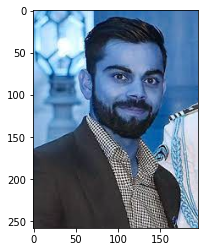

In [ ]:
plt.imshow(img)


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(258, 195)

In [ ]:
gray

array([[220, 215, 212, ..., 129, 129, 129],
       [218, 216, 214, ..., 129, 129, 129],
       [216, 217, 217, ..., 130, 130, 130],
       ...,
       [ 57,  56,  56, ..., 171, 157, 197],
       [ 54,  54,  54, ..., 172, 151, 176],
       [ 54,  54,  54, ..., 165, 145, 170]], dtype=uint8)

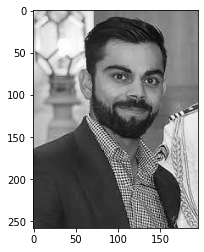

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Image-Classifier-master/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Image-Classifier-master/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 65,  37, 108, 108]], dtype=int32)

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

(65, 37, 108, 108)

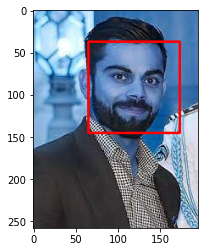

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

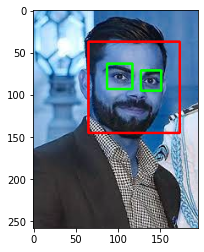

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

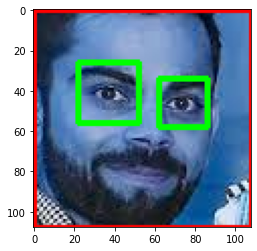

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
cropped_img = np.array(roi_color)
cropped_img.shape

(108, 108, 3)

In [ ]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

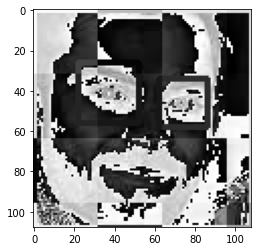

In [ ]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

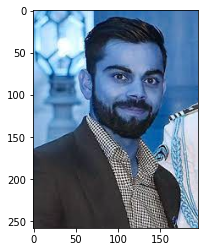

In [ ]:
original_image = cv2.imread('/content/drive/MyDrive/Image-Classifier-master/model/test_images/virat1.jpg')
plt.imshow(original_image)

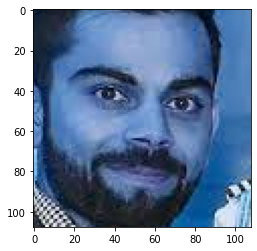

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('/content/drive/MyDrive/Image-Classifier-master/model/test_images/virat1.jpg')
plt.imshow(cropped_image)

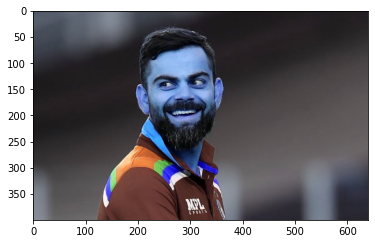

In [ ]:
org_image_obstructed = cv2.imread('/content/drive/MyDrive/Image-Classifier-master/model/test_images/virat2.jpg')
plt.imshow(org_image_obstructed)

In [ ]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/drive/MyDrive/Image-Classifier-master/model/test_images/virat2.jpg')
cropped_image_no_2_eyes

array([[[ 25,  25,  31],
        [ 25,  24,  33],
        [ 24,  25,  35],
        ...,
        [ 36,  30,  35],
        [ 39,  32,  37],
        [ 39,  32,  37]],

       [[ 20,  19,  28],
        [ 25,  26,  36],
        [ 16,  18,  28],
        ...,
        [ 37,  31,  36],
        [ 39,  32,  37],
        [ 39,  32,  37]],

       [[ 30,  29,  38],
        [ 16,  17,  27],
        [ 50,  52,  63],
        ...,
        [ 38,  32,  37],
        [ 39,  32,  37],
        [ 39,  32,  37]],

       ...,

       [[ 49,  46,  41],
        [123, 114, 111],
        [166, 151, 149],
        ...,
        [ 80,  74,  75],
        [ 79,  73,  74],
        [ 80,  74,  75]],

       [[ 54,  49,  40],
        [179, 166, 158],
        [169, 147, 141],
        ...,
        [ 80,  74,  75],
        [ 80,  74,  75],
        [ 81,  75,  76]],

       [[ 72,  66,  55],
        [189, 173, 161],
        [187, 161, 149],
        ...,
        [ 81,  75,  76],
        [ 81,  75,  76],
        [ 81,  75,  76]]

In [ ]:
path_to_data = "/content/drive/MyDrive/Image-Classifier-master/model/dataset"
path_to_cr_data = "/content/drive/MyDrive/Image-Classifier-master/model/dataset/cropped"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/drive/MyDrive/Image-Classifier-master/model/dataset/maria_sharapova',
 '/content/drive/MyDrive/Image-Classifier-master/model/dataset/cropped',
 '/content/drive/MyDrive/Image-Classifier-master/model/dataset/lionel_messi',
 '/content/drive/MyDrive/Image-Classifier-master/model/dataset/roger_federer',
 '/content/drive/MyDrive/Image-Classifier-master/model/dataset/serena_williams',
 '/content/drive/MyDrive/Image-Classifier-master/model/dataset/virat_kohli']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedmaria_sharapova
Generating cropped images in folder:  /content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedlionel_messi
Generating cropped images in folder:  /content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedroger_federer
Generating cropped images in folder:  /content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedserena_williams
Generating cropped images in folder:  /content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedvirat_kohli


In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppedlionel_messi': ['/content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedlionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedlionel_messi/lionel_messi2.png',
  '/content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedlionel_messi/lionel_messi3.png',
  '/content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedlionel_messi/lionel_messi4.png',
  '/content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedlionel_messi/lionel_messi5.png',
  '/content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedlionel_messi/lionel_messi6.png',
  '/content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedlionel_messi/lionel_messi7.png',
  '/content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedlionel_messi/lionel_messi8.png',
  '/content/drive/MyDrive/Image-Classifier-master/model/dataset/croppedlionel_messi/lionel_messi9.png',
  '/content/drive/MyDrive/Image-Classifie

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppedlionel_messi': 1,
 'croppedmaria_sharapova': 0,
 'croppedroger_federer': 2,
 'croppedserena_williams': 3,
 'croppedvirat_kohli': 4}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [ ]:
len(X[0])

4096

In [ ]:
32*32*3 + 32*32

4096

In [ ]:
X[0]

array([[173],
       [174],
       [174],
       ...,
       [253],
       [233],
       [252]], dtype=uint8)

In [ ]:
y[0]

0

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(187, 4096)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.851063829787234

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       1.00      0.78      0.88         9
           2       0.56      0.83      0.67         6
           3       0.90      0.82      0.86        11
           4       0.92      1.00      0.96        12

    accuracy                           0.85        47
   macro avg       0.85      0.84      0.84        47
weighted avg       0.88      0.85      0.86        47



In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.742857,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.628571,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.778571,{'logisticregression__C': 1}


In [ ]:
best_estimators

{'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))])}

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.851063829787234

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.723404255319149

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.851063829787234

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  1,  0,  1],
       [ 0,  7,  2,  0,  0],
       [ 0,  0,  5,  1,  0],
       [ 1,  0,  1,  9,  0],
       [ 0,  0,  0,  0, 12]])

Text(69.0, 0.5, 'Truth')

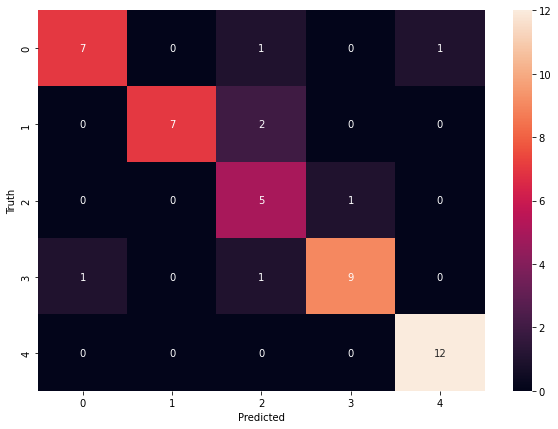

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'croppedlionel_messi': 1,
 'croppedmaria_sharapova': 0,
 'croppedroger_federer': 2,
 'croppedserena_williams': 3,
 'croppedvirat_kohli': 4}

In [ ]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))